In [1]:
# append rxn_yield_context to the PYTHONPATH
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm
import pandas as pd

new_path = 'D:\\Retro\\rxn_yield_context'
sys.path.append(new_path)
print(sys.path)


C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


['D:\\Retro\\rxn_yield_context\\rxn_yield_context\\analyze', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\python37.zip', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\DLLs', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37', '', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\win32', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\win32\\lib', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\Pythonwin', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\sun73\\.ipython', 'D:\\Retro\\rxn_yield_context']


In [10]:
# Get the number of each reaction set
reaxys_dir = "../../Data_From_Reaxys_Original"
dir_names = ['Diels_Alder', 'Hydrolysis', 'Hydrogenation', 'ReductiveAmination',
            'PausonKhandReaction', 'NegishiCouplings',
            'FischerIndoleSynthesis','Friedel-Crafts_Acylation','Friedel-Crafts_Alkylation','GrignardReaction'] # Change Here

def basic_preprocess(data_path):
    keep_index = ['Reaction ID', 'Reaction', 'Temperature (Reaction Details) [C]', 
                  'Yield (numerical)','Reagent', 'Solvent (Reaction Details)']
    data = pd.read_excel(data_path)
    drop_index = list(data.columns)
    for index in list(data.columns):
        if index in keep_index:
            drop_index.remove(index)
    data = data.drop(drop_index,axis=1)
    data = data[:-3] # copyright or something 
    return data

def reaction_entry(reaction_ids):
    now = '0'
    number = 0
    for id_ in reaction_ids:
        if id_ != now:
            number += 1
            now = id_
    return number
            
records = dict()
raw_datas = dict()
    
file_path = os.path.join(reaxys_dir, dir_names[0])
a = os.listdir(file_path)
for dir_name in tqdm(dir_names):
    file_path = os.path.join(reaxys_dir, dir_name)
    for i, file_name in enumerate(os.listdir(file_path)):
        data_path = os.path.join(file_path, file_name)
        if i == 0:
            reaction_set = basic_preprocess(data_path)
        else:
            data = basic_preprocess(data_path)
            reaction_set = reaction_set.append(data, ignore_index=True)
    
    records.update({dir_name: [reaction_entry(reaction_set['Reaction ID']), len(reaction_set['Reaction ID'])]})
    raw_datas.update({dir_name : reaction_set})


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:39<00:00, 21.99s/it]


In [3]:
list(zip(*records.items()))[1]

([19565, 26590],
 [39322, 73860],
 [41341, 121787],
 [50668, 58480],
 [3542, 4270],
 [11514, 13521])

{'Diels_Alder': [19565, 26590], 'Hydrolysis': [39322, 73860], 'Hydrogenation': [41341, 121787], 'ReductiveAmination': [50668, 58480], 'PausonKhandReaction': [3542, 4270], 'NegishiCouplings': [11514, 13521], 'FischerIndoleSynthesis': [6869, 8633], 'Friedel-Crafts_Acylation': [10476, 25844], 'Friedel-Crafts_Alkylation': [17799, 31396], 'GrignardReaction': [14019, 23628]}


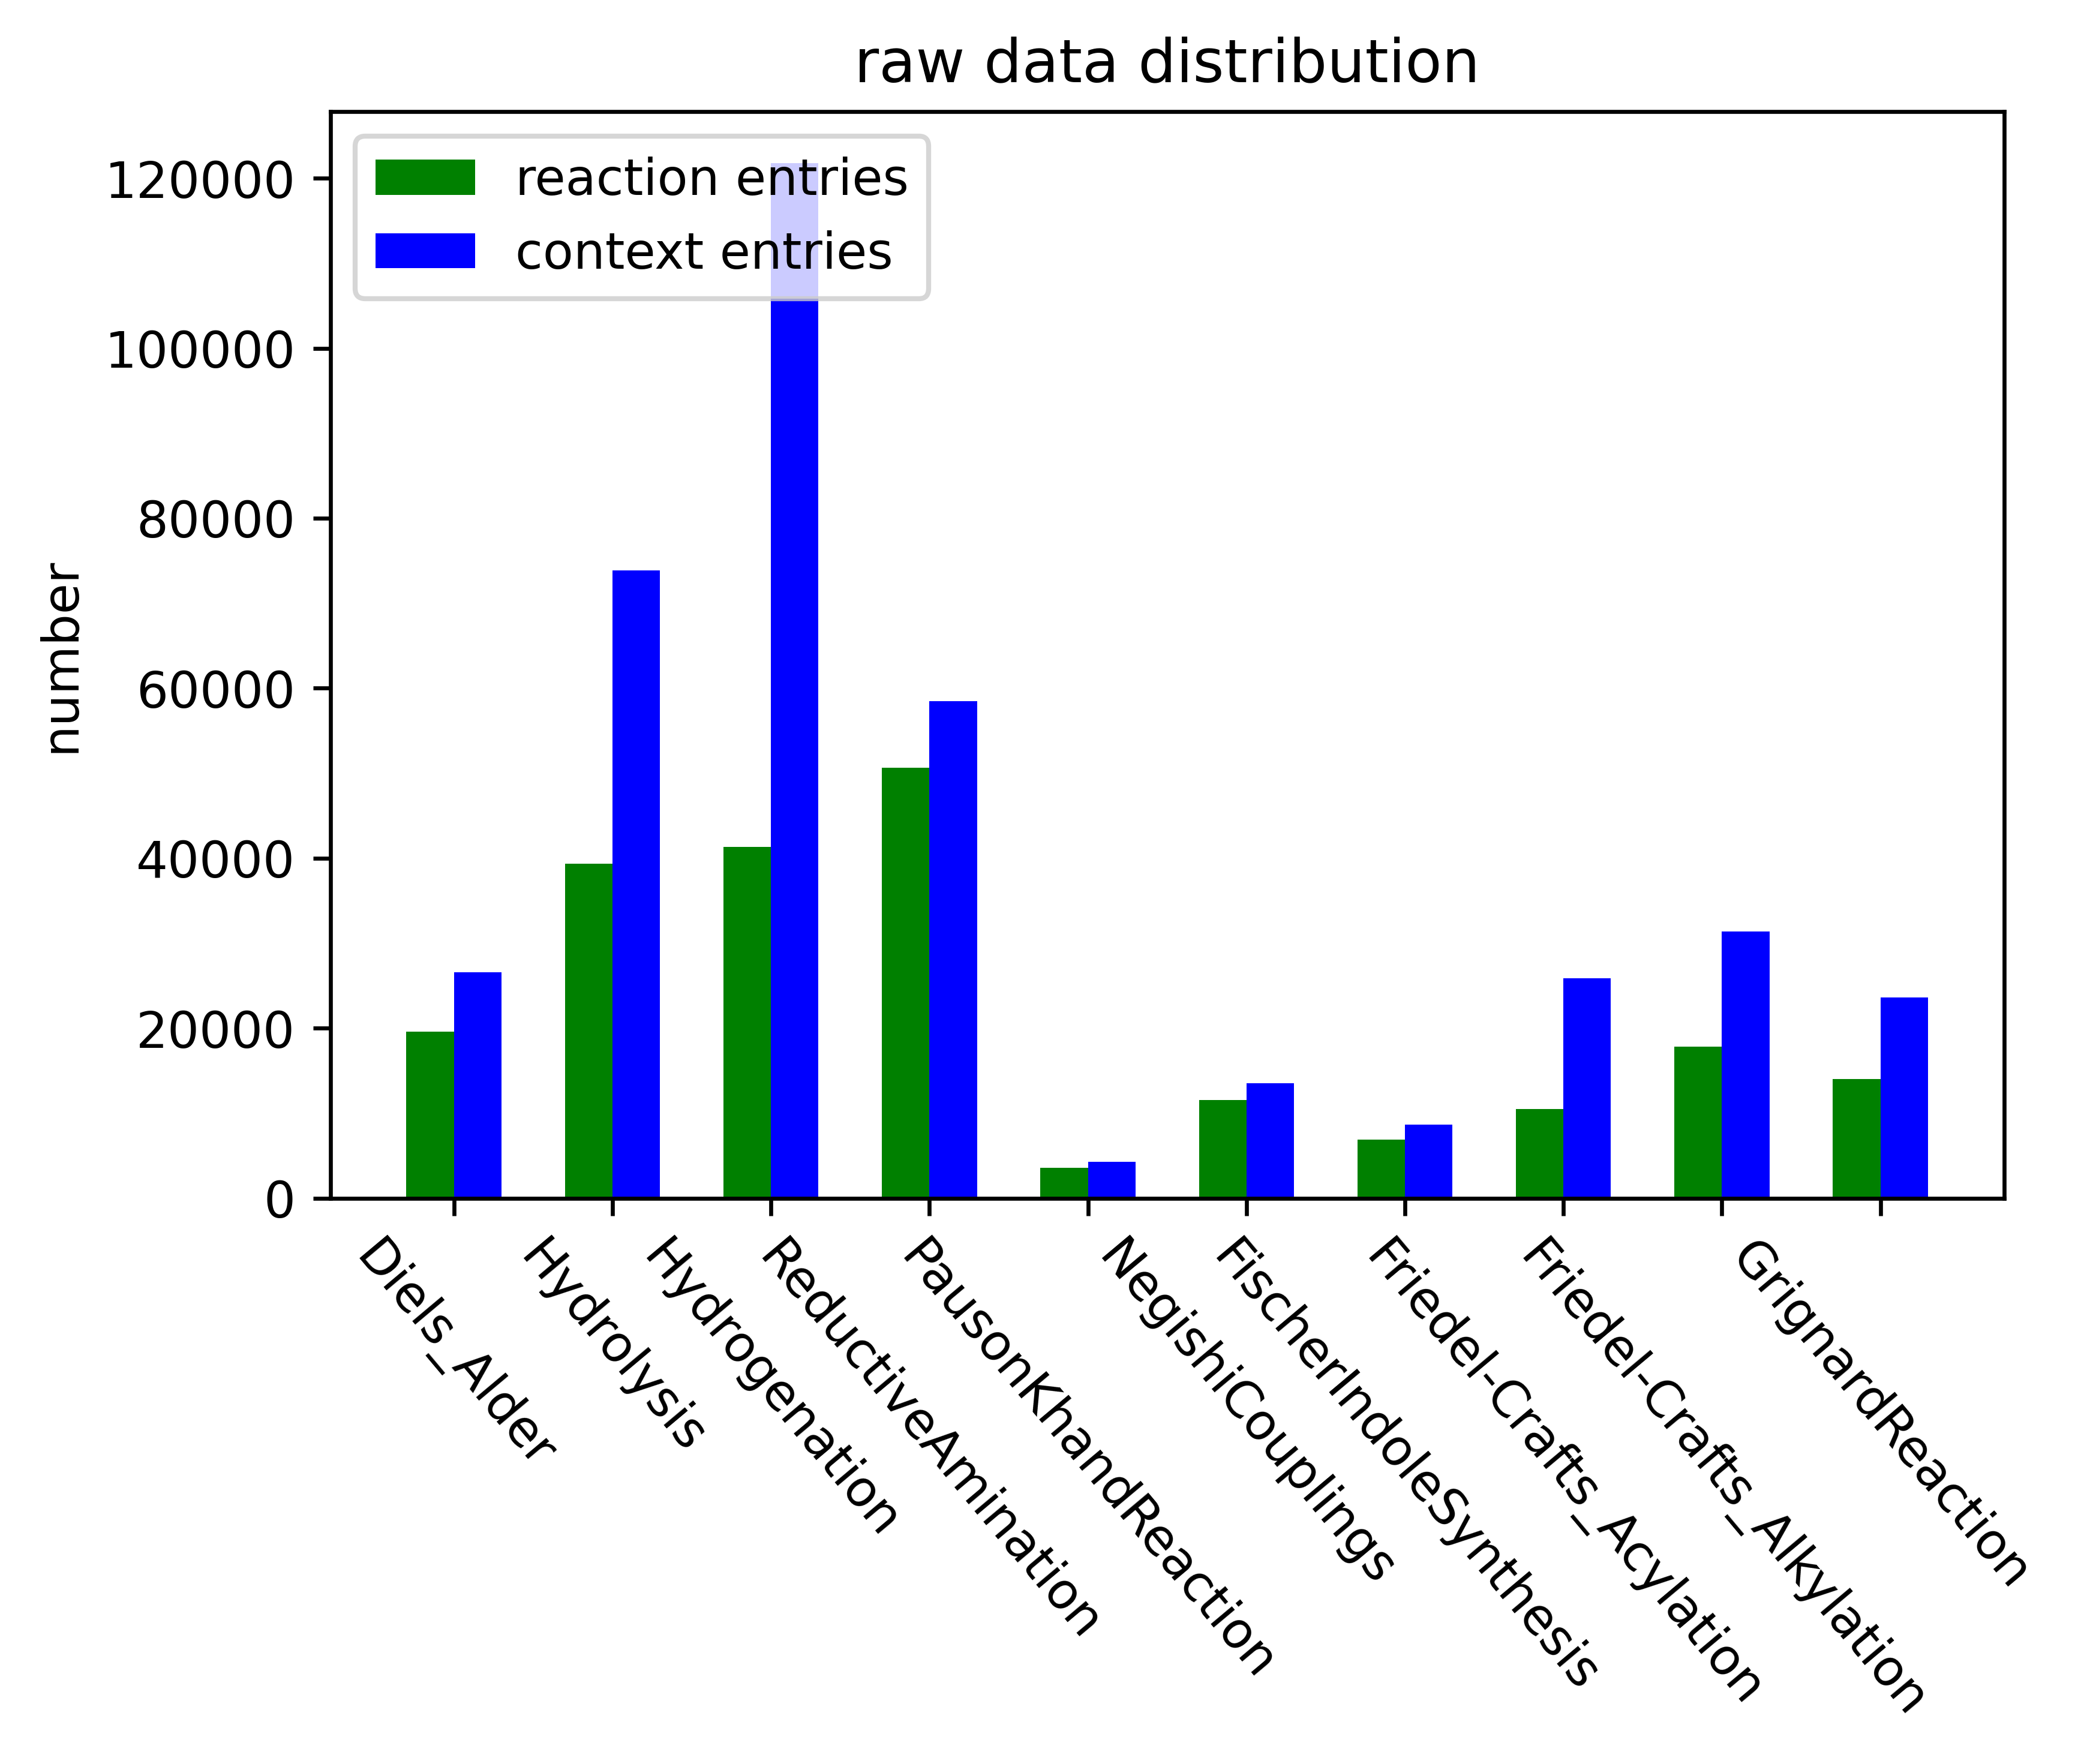

In [11]:
def reaction_entry(reaction_ids):
    now = '0'
    number = 0
    for id_ in reaction_ids:
        if id_ != now:
            number += 1
            now = id_
    return number

def data_distribution(records, title = ''):
    reaction_names, entries = list(zip(*records.items()))
    reaction_entry, context_entry = list(zip(*entries))
    x = np.arange(len(reaction_names))
    width = 0.3
    plt.figure(dpi = 600)
    plt.bar(x, reaction_entry, width, color='green', label='reaction entries')
    plt.bar(x + width, context_entry, width, color='blue', label='context entries')
    plt.xticks(x + width / 2, reaction_names, rotation=-50, ha='center')
    plt.ylabel('number')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0,1), loc='upper left')
    plt.show()


print(records)
data_distribution(records, 'raw data distribution')

In [12]:
# Prepare a dictionary to search what reaction a Reaction ID belongs to.
# ['Diels_Alder', 'Hydrolysis', 'Hydrogenation', 'ReductiveAmination','PausonKhandReaction', 'NegishiCouplings']

Reaction_ID_search = dict()
for reaction_name, data in raw_datas.items():
    for reaction_id in data['Reaction ID']:
        Reaction_ID_search.update({reaction_id: reaction_name})

print(len(Reaction_ID_search)) 
Reaction_ID_search['28100547']

214425


'Diels_Alder'

In [13]:
def get_txt_data(input_path):
    f = open(input_path, 'r')
    data = f.readlines()
    f.close()
    return data

target_dir = "../All_LCC_Data/processed_data_temp_large_new"
train_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_train_labels_processed.txt'))
validate_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_validate_labels_processed.txt'))
test_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_test_labels_processed.txt'))

all_data = train_data + validate_data + test_data
all_data = [ line.strip('\n').split('\t')  for line in all_data]

print(all_data[0])
# Reaxys ID, reactant smiles, product smiles, yield, reagent, solvent, temperature
_, _, _, yields, reagents, solvents, temperatures = list(zip(*all_data))

yields = [float(y) for y in yields]
temperatures = [float(t)  for t in temperatures if float(t) ]

print(max(temperatures))
print(min(temperatures))


['29904919', 'CC(=O)OC[C@H]1OC(O)[C@H](OC(C)=O)[C@H]1OC(C)=O.CC#CCN(CC=C)S(=O)(=O)C1=CC=C(C)C=C1', 'CC1=C2CN(CC2CC1=O)S(=O)(=O)C1=CC=C(C)C=C1', '54', "chloro(1,5-cyclooctadiene)rhodium(I) dimer; 2,2'-bis-(diphenylphosphino)-1,1'-binaphthyl", '5,5-dimethyl-1,3-cyclohexadiene', '75.0']
2160.0
-110.0


100%|███████████████████████████████████████████████████████████████████████| 67945/67945 [00:00<00:00, 1061092.98it/s]


{'Diels_Alder': [6120, 6525], 'Hydrolysis': [6434, 8396], 'Hydrogenation': [2704, 9312], 'ReductiveAmination': [11274, 12122], 'PausonKhandReaction': [1239, 1430], 'NegishiCouplings': [4566, 4875], 'FischerIndoleSynthesis': [583, 633], 'Friedel-Crafts_Acylation': [4154, 5086], 'Friedel-Crafts_Alkylation': [8312, 12576], 'GrignardReaction': [6010, 6976]}


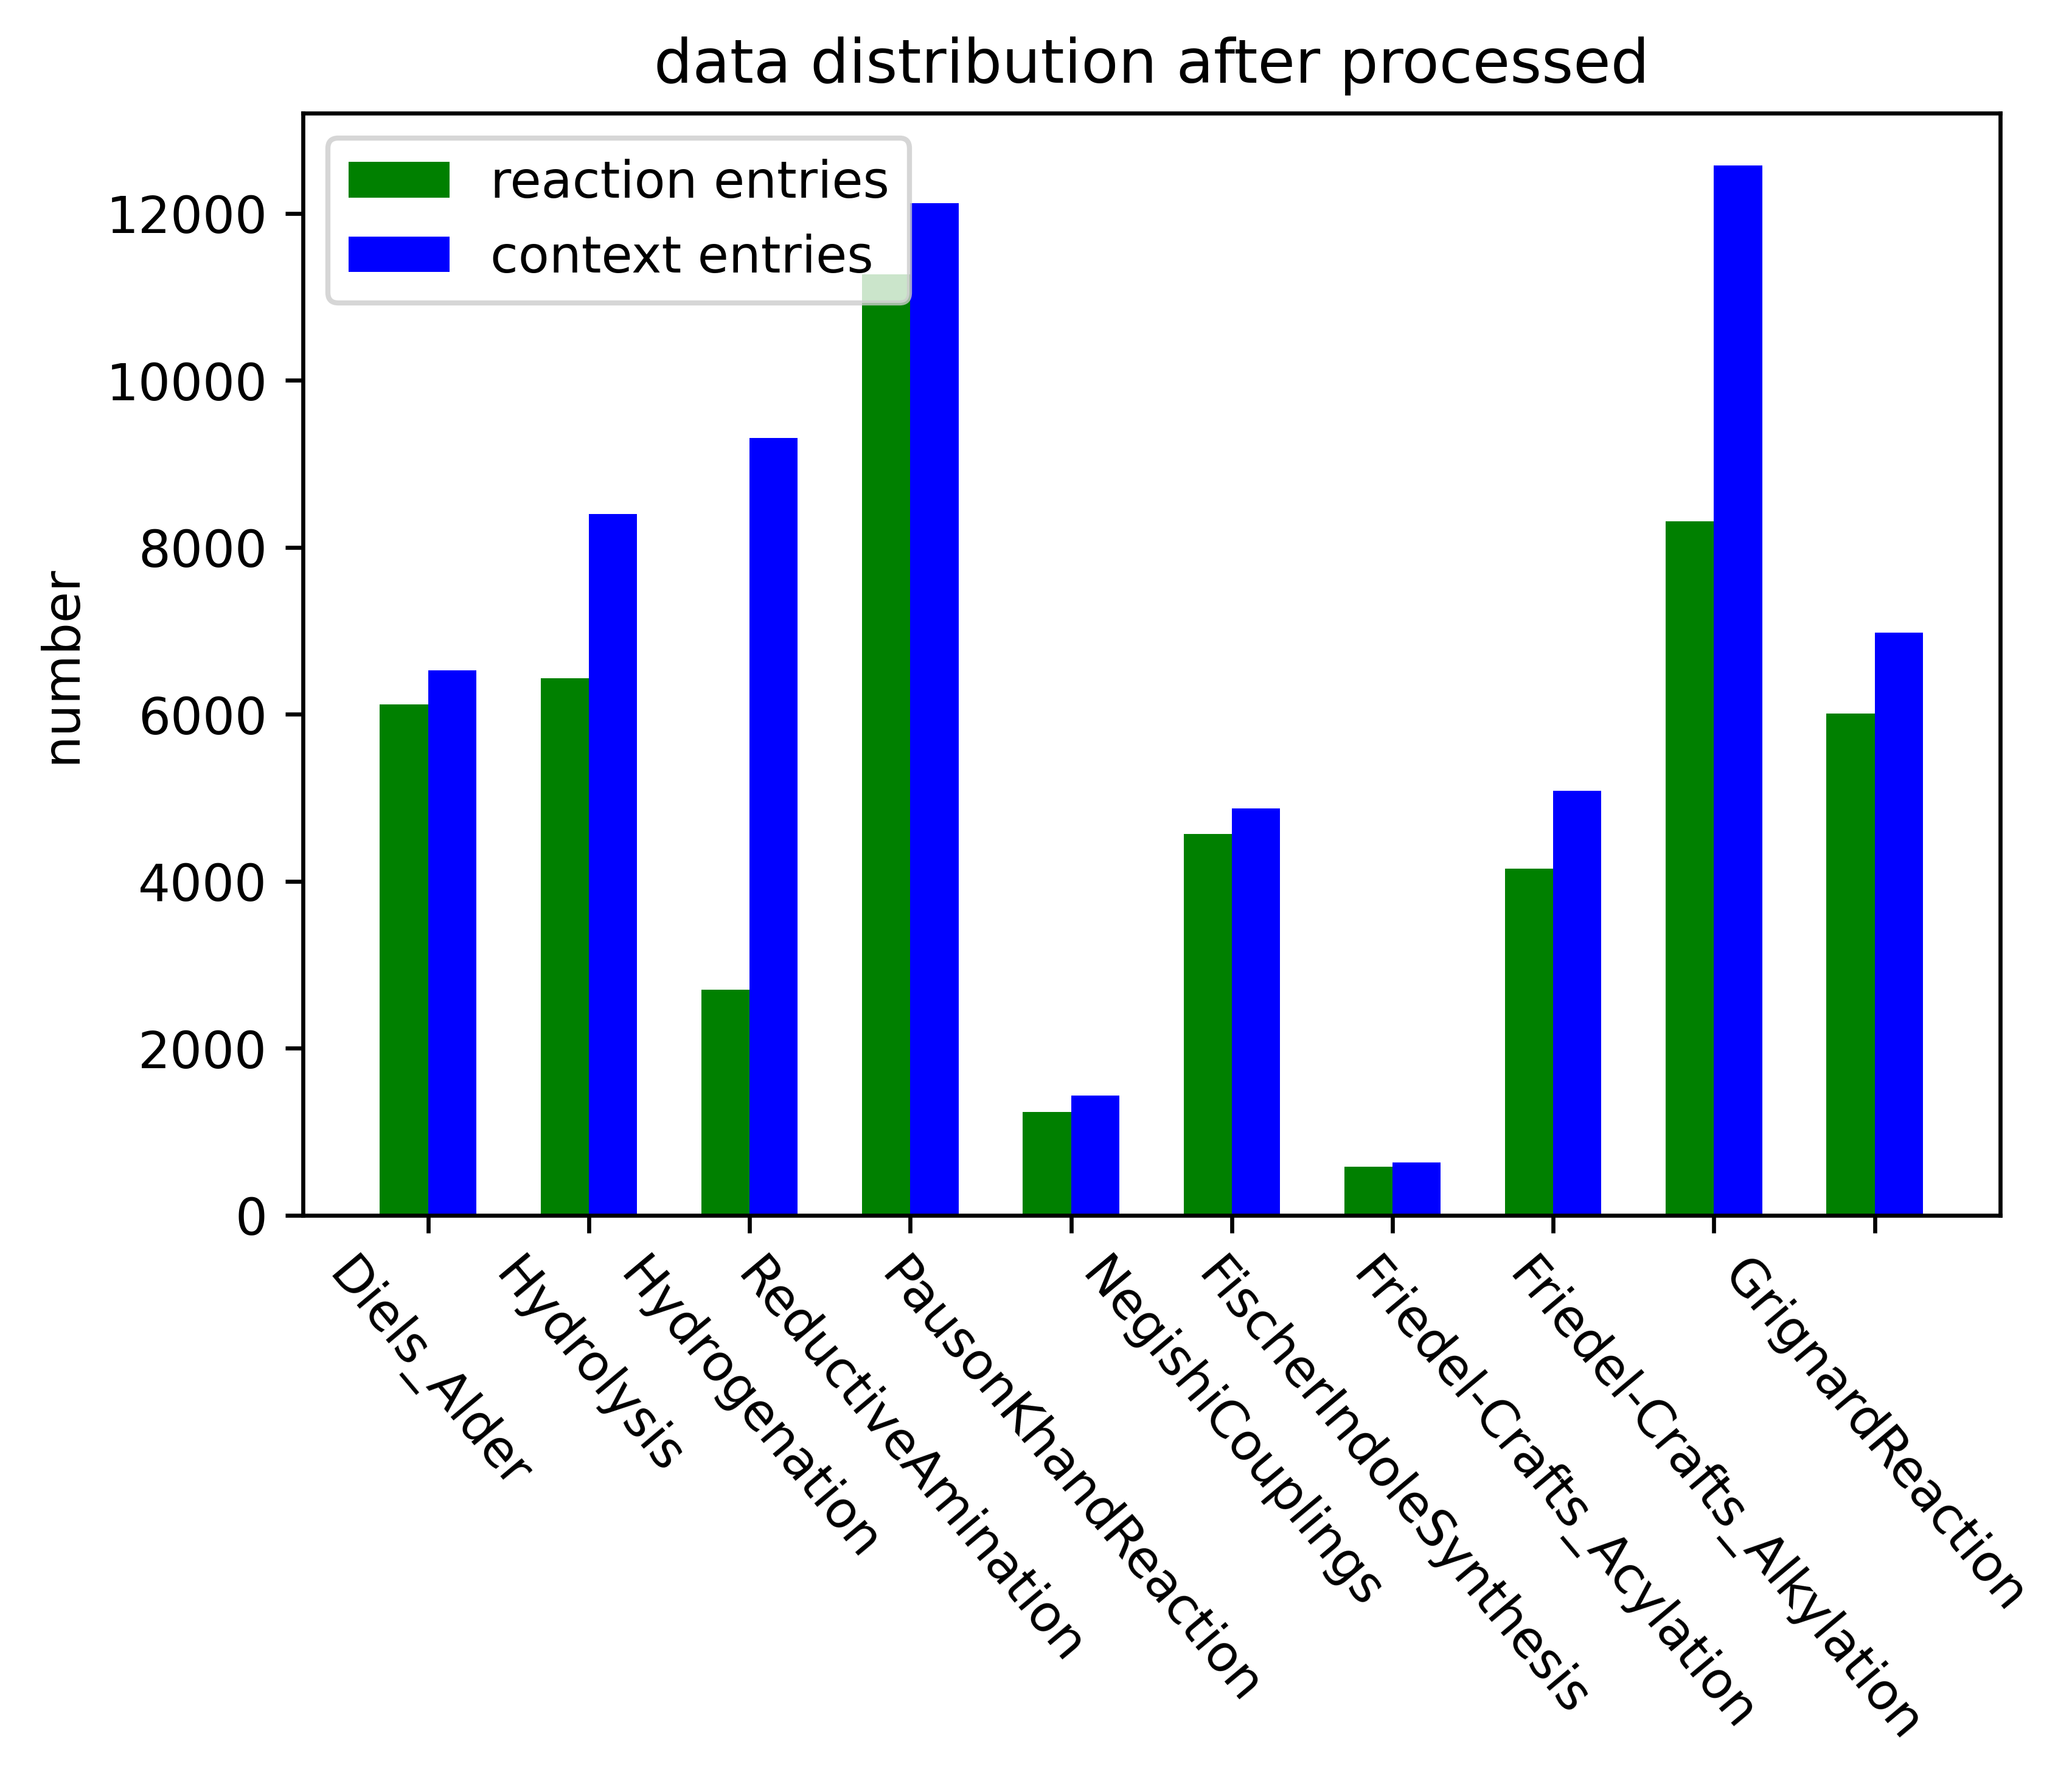

In [14]:
# Get the data distribution after all the data preprocessing
records_processed = {name: [0,0] for name in dir_names}
pre_reaxys_id = ''

for reaxys_id in tqdm(list(zip(*all_data))[0]):
    try:
        key = Reaction_ID_search[reaxys_id]
    except:
        #print(reaxys_id)
        continue
    #for key, value in raw_datas.items():
        #if reaxys_id in list(value['Reaction ID']):f
    records_processed[key][1] += 1
    if reaxys_id != pre_reaxys_id: records_processed[key][0] += 1
    pre_reaxys_id = reaxys_id

        

print(records_processed)
data_distribution(records_processed, 'data distribution after processed')

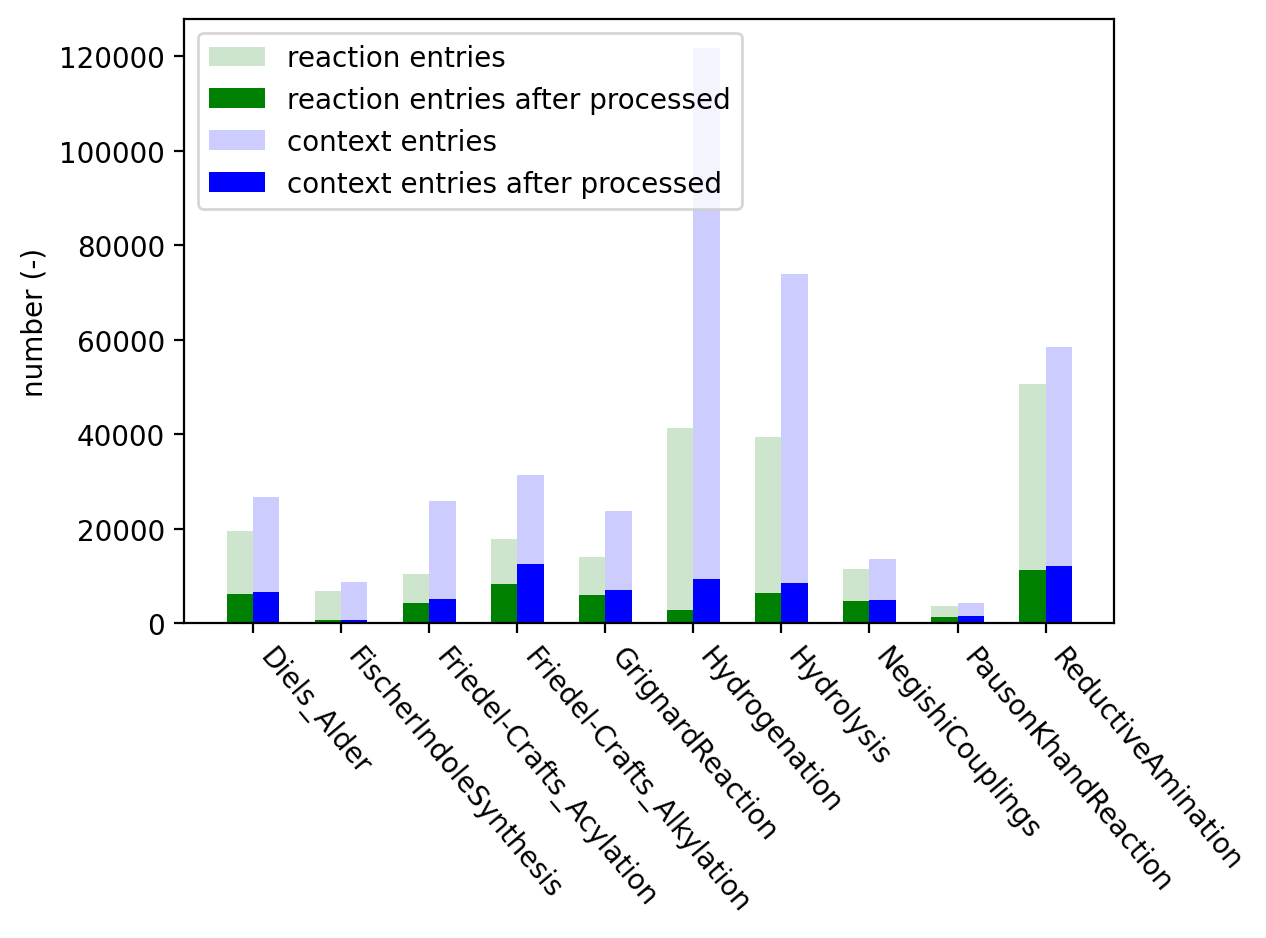

In [15]:
# print the joint distribution of data before and after data-preprocess
def joint_data_distribution(records, records_processed, title = ''):
    reaction_names, entries = list(zip(*sorted(records.items())))
    reaction_entry, context_entry = list(zip(*entries))
    
    reaction_names, entries_processed = list(zip(*sorted(records_processed.items())))
    reaction_entry_processed, context_entry_processed = list(zip(*entries_processed))
    
    x = np.arange(len(reaction_names))
    width = 0.3
    plt.figure(dpi = 200)
    plt.bar(x, reaction_entry, width, color='green', label='reaction entries', alpha =0.2)
    plt.bar(x, reaction_entry_processed, width, color='green', label='reaction entries after processed', alpha =1)
    
    plt.bar(x + width, context_entry, width, color='blue', label='context entries', alpha =0.2)
    plt.bar(x + width, context_entry_processed, width, color='blue', label='context entries after processed', alpha =1)                                         
                                             
    plt.xticks(x + width / 2, reaction_names, rotation=-50, ha='left')
    plt.ylabel('number (-)')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0,1), loc='upper left')
    plt.show()
                                             
joint_data_distribution(records, records_processed)

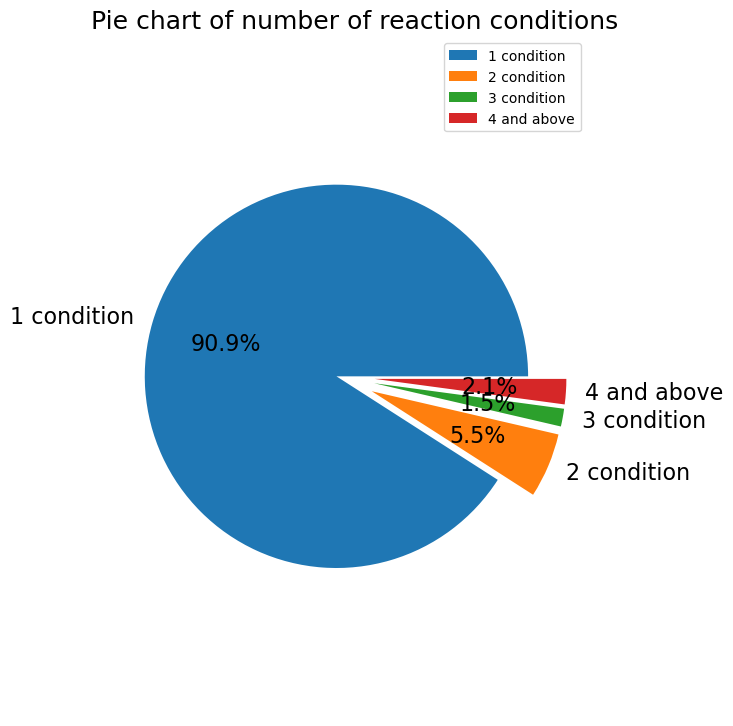

In [16]:
# Check the multiple reaction context entries
def sort_out_data(data):
    sorted_data = []
    rxn_id = ''
    j = -1
    for i in range(len(data)):
        if rxn_id != data[i][0]:
            j += 1
            sorted_data.append([data[i][0], data[i][1], data[i][2], []])
            y_ = data[i][3]; r_ = remove_duplicated_records(data[i][4]);
            s_ = remove_duplicated_records(data[i][5]); t_ = data[i][6];
            sorted_data[j][3].append((y_, r_, s_, t_))
            rxn_id = data[i][0]
        else:
            if (r_ == remove_duplicated_records(data[i][4])) & (s_ == remove_duplicated_records(data[i][5])):
                pass
            else:
                y_ = data[i][3]; r_ = remove_duplicated_records(data[i][4]);
                s_ = remove_duplicated_records(data[i][5]); t_ = data[i][6];
                sorted_data[j][3].append((y_, r_, s_, t_))
    return sorted_data

def remove_duplicated_records(records):
    return '; '.join(list(dict.fromkeys(records.split('; '))))

def cum_sum_dict(results, start):
    record = dict()
    above = 0
    for key, value in results.items():
        if key < start:
            record[str(key)+' condition'] = value
        else:
            above += value
    record[str(start)+' and above'] = above
    return record


data_sorted = sort_out_data(all_data)
conditions = []
for i, rxn in enumerate(data_sorted):
    context = rxn[3]
    conditions.append(len(context))
results = Counter(conditions)
pie_data = cum_sum_dict(results, 4)

plt.figure(figsize=(6,9), dpi =100)    # 顯示圖框架大小
labels, size = list(zip(*sorted(pie_data.items())))      # 製作圓餅圖的類別標籤
separeted = (0, 0.2, 0.2, 0.2)                  # 依據類別數量，分別設定要突出的區塊
# size = accident["count"]                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16},  # 文字大小
        shadow=False)                    # 設定陰影

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of number of reaction conditions", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")

Text(0, 0.5, 'number')

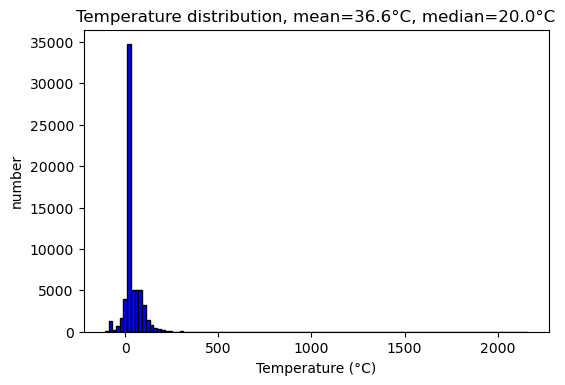

In [12]:
# Temperature histogram 1
plt.figure(dpi=100)
plt.hist(temperatures, color = 'blue', edgecolor = 'black',
         bins = int((max(temperatures) - min(temperatures))//20))
plt.title('Temperature distribution, mean={:.1f}\u00b0C, median={:.1f}\u00b0C'.format(
    np.mean(temperatures), np.median(temperatures)))
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('number')


Text(0, 0.5, 'number')

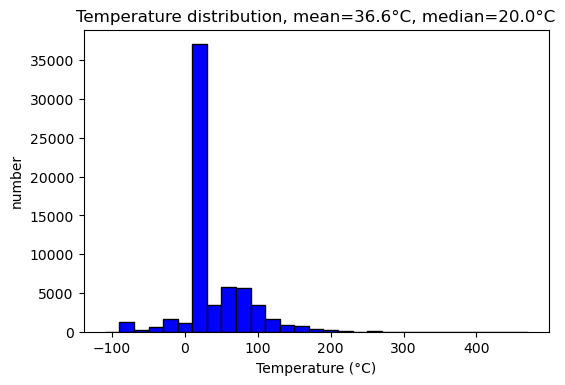

In [13]:
# Temperature histogram 2 (excludue temperature > 300)
temperatures_2 = [float(t)  for t in temperatures if float(t) <=501.]
plt.figure(dpi=100)
plt.hist(temperatures_2, color = 'blue', edgecolor = 'black',
         bins = int((max(temperatures_2) - min(temperatures_2))//20))

plt.title('Temperature distribution, mean={:.1f}\u00b0C, median={:.1f}\u00b0C'.format(
    np.mean(temperatures), np.median(temperatures)))
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('number')

In [14]:
# Calcluate the accuracy of tempreature basline:
# Use the mean and median of training data as baslines, and then evaluate the performance on testing data
def accuracy_within_range(temp_diffs, span):
    acc = [1 if (np.abs(t) <= span) else 0 for t in temp_diffs ]
    return sum(acc)/len(acc)

mean_temp = np.mean(temperatures[:len(train_data)])
median_temp = np.median(temperatures[:len(train_data)])
mean_diffs = [(t - mean_temp) for t in temperatures[len(train_data)+len(validate_data):]]
median_diffs = [(t - median_temp) for t in temperatures[len(train_data)+len(validate_data):]]
span1 = 10
span2 = 20

print('Mean temperature ({:.1f}\u00b0C) baseline:'.format(mean_temp))
print('RMSE of mean temperature: {:.1f}'.format(np.sqrt(np.average(np.square(mean_diffs)))))
print('MAE of mean temperature: {:.1f}'.format(np.average(np.abs(mean_diffs))))
print('Mean temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span1, 100*accuracy_within_range(mean_diffs, span1))) 
print('Mean temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span2, 100*accuracy_within_range(mean_diffs, span2)))

print('-'*50)
print('Median temperature ({:.1f}\u00b0C) baseline:'.format(median_temp))
print('RMSE of median temperature: {:.1f}'.format(np.sqrt(np.average(np.square(median_diffs)))))
print('MAE of median temperature: {:.1f}'.format(np.average(np.abs(median_diffs))))
print('Median temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span1, 100*accuracy_within_range(median_diffs, span1))) 
print('Median temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span2, 100*accuracy_within_range(median_diffs, span2)))
    

Mean temperature (36.8°C) baseline:
RMSE of mean temperature: 57.4
MAE of mean temperature: 31.9
Mean temperature predictions fall within +-10°C accuracy: 5.7%
Mean temperature predictions fall within +-20°C accuracy: 59.6%
--------------------------------------------------
Median temperature (20.0°C) baseline:
RMSE of median temperature: 59.6
MAE of median temperature: 27.4
Median temperature predictions fall within +-10°C accuracy: 56.7%
Median temperature predictions fall within +-20°C accuracy: 61.6%


Text(0, 0.5, 'number')

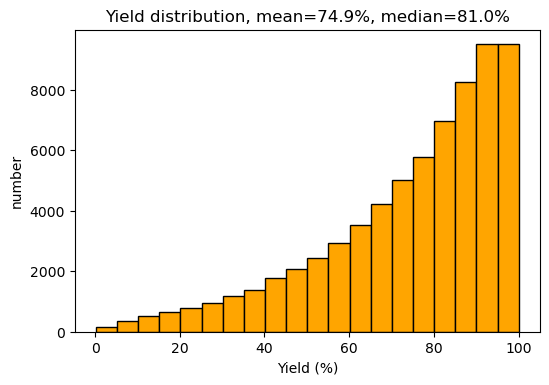

In [15]:
# Yield histogram
plt.figure(dpi=100)
plt.hist(yields, color = 'orange', edgecolor = 'black',
         bins = 20)

plt.title('Yield distribution, mean={:.1f}%, median={:.1f}%'.format(
    np.mean(yields), np.median(yields)))
plt.xlabel('Yield (%)')
plt.ylabel('number')

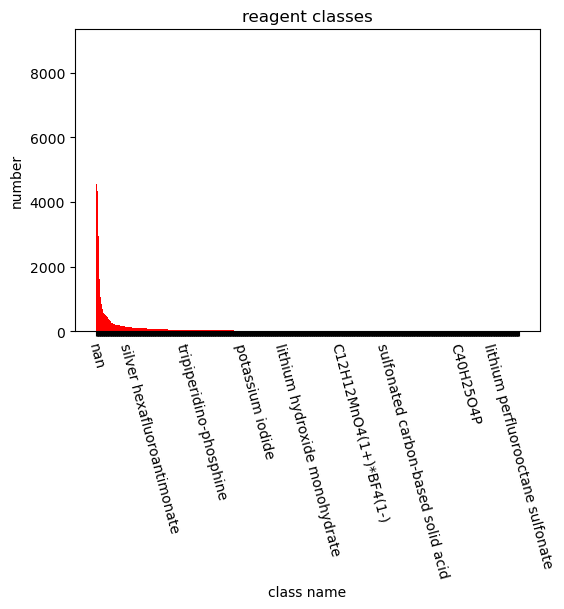

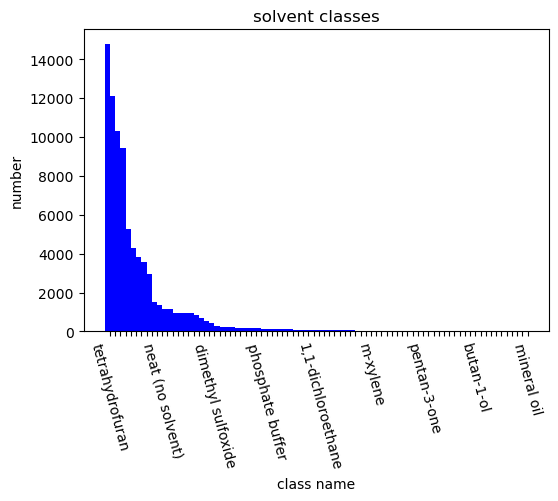

In [17]:
# Visualize reagent and solvent classes distribution
def plot_classes(classes_list, title = '', color = 'r'):
    names, counts = zip(*classes_list)
    show = len(names)//8
    names = [n if ((i+1)%show == 1) else '' for i, n in enumerate(names) ]
    pos = np.arange(len(names))
    width = 1.0
    plt.figure(dpi=100)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(names, rotation=-75)
    plt.ylabel('number')
    plt.xlabel('class name')
    plt.title(title)
    plt.bar(pos, counts, width, color=color)
    plt.show()

reag_list = []; solv_list = [];
for reagent, solvent in zip(reagents, solvents):
    reag_list += reagent.split('; ')
    solv_list += solvent.split('; ')
reag_list = list(Counter(reag_list).items())
reag_list = sorted(reag_list, key=lambda x:x[1], reverse=True)
solv_list = list(Counter(solv_list).items())
solv_list = sorted(solv_list, key=lambda x:x[1], reverse=True)

plot_classes(reag_list, title = 'reagent classes', color = 'r')
plot_classes(solv_list, title = 'solvent classes', color = 'b')

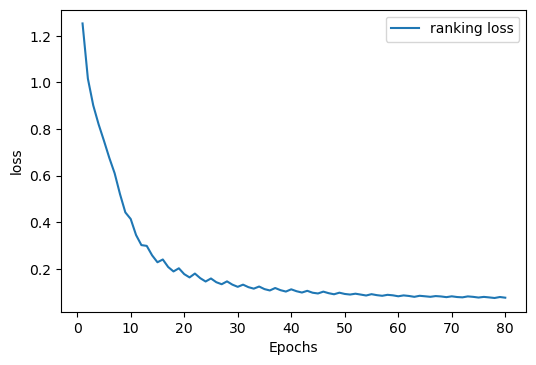

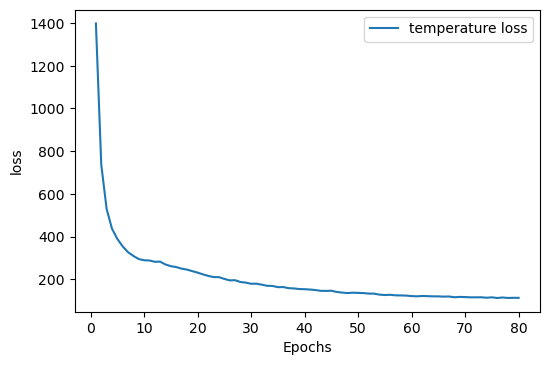

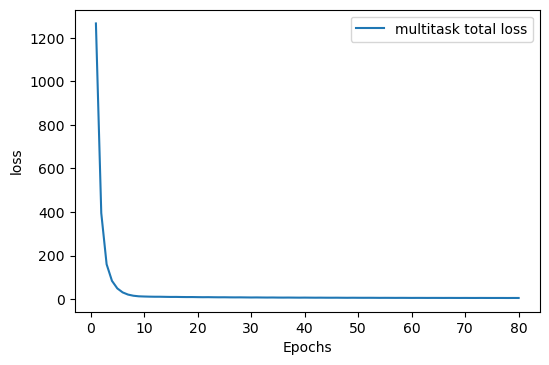

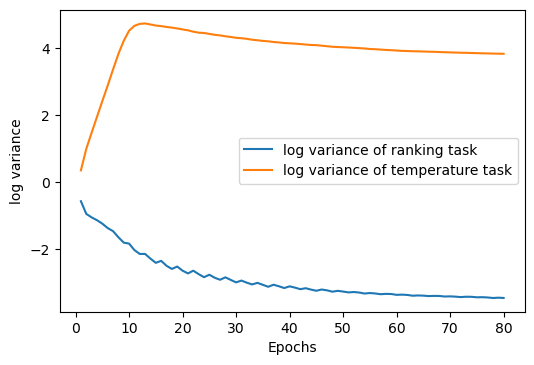

In [7]:
# post-analyze the training process (should be done when training)

def plot_summary(epoch_dict, labels, ylabel, color = 'b'):
    plt.figure(dpi=100)
    for label in labels:
        keys = []
        sub_values = []
        for key, value in epoch_dict.items():
            keys.append(key)
            sub_values.append(epoch_dict[key][label])
        plt.plot(keys, sub_values, label=label)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    # plt.show()

log_path = os.path.join(target_dir, 'train_log.txt')
f = open(log_path, 'r')
train_log = f.readlines()
f.close()
epoch_dict = dict()
for i, line in enumerate(train_log):
    if 'epoch: ' in line:
        number = int(line.strip('\n').split(': ')[-1])
        epoch_dict[number] = dict()
        epoch_dict[number]['ranking loss'] = float(train_log[i+1].strip('\n').split(': ')[-1])
        epoch_dict[number]['temperature loss'] = float(train_log[i+2].strip('\n').split(': ')[-1])
        epoch_dict[number]['multitask total loss'] = float(train_log[i+3].strip('\n').split(': ')[-1])
        epoch_dict[number]['log variance of ranking task'] = float(train_log[i+4].strip('\n').split(': ')[-1])
        epoch_dict[number]['log variance of temperature task'] = float(train_log[i+5].strip('\n').split(': ')[-1])

plot_summary(epoch_dict, ['ranking loss'], 'loss', color = 'b')
plot_summary(epoch_dict, ['temperature loss'], 'loss', color = 'g')
plot_summary(epoch_dict, ['multitask total loss'], 'loss', color = 'r')
plot_summary(epoch_dict, ['log variance of ranking task', 'log variance of temperature task'], 'log variance', color = 'y')
#plot_summary(epoch_dict, ['log variance of temperature task'], 'loss', color = 'y')

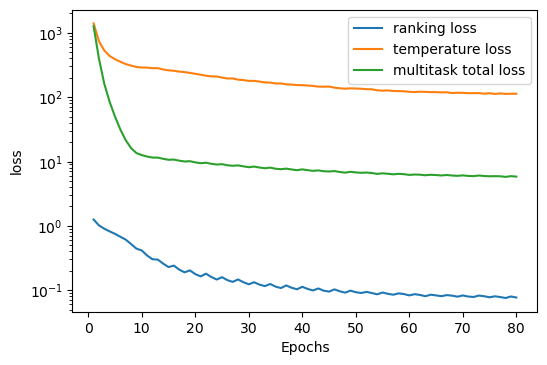

In [6]:
def plot_summary(epoch_dict, labels, ylabel, color = 'b'):
    plt.figure(dpi=100)
    for label in labels:
        keys = []
        sub_values = []
        for key, value in epoch_dict.items():
            keys.append(key)
            sub_values.append(epoch_dict[key][label])
        plt.plot(keys, sub_values, label=label)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.yscale('log')
    plt.legend()
    # plt.show()

log_path = os.path.join(target_dir, 'train_log.txt')
f = open(log_path, 'r')
train_log = f.readlines()
f.close()
epoch_dict = dict()
for i, line in enumerate(train_log):
    if 'epoch: ' in line:
        number = int(line.strip('\n').split(': ')[-1])
        epoch_dict[number] = dict()
        epoch_dict[number]['ranking loss'] = float(train_log[i+1].strip('\n').split(': ')[-1])
        epoch_dict[number]['temperature loss'] = float(train_log[i+2].strip('\n').split(': ')[-1])
        epoch_dict[number]['multitask total loss'] = float(train_log[i+3].strip('\n').split(': ')[-1])
        epoch_dict[number]['log variance of ranking task'] = float(train_log[i+4].strip('\n').split(': ')[-1])
        epoch_dict[number]['log variance of temperature task'] = float(train_log[i+5].strip('\n').split(': ')[-1])

plot_summary(epoch_dict, ['ranking loss', 'temperature loss', 'multitask total loss'], 'loss', color = 'y')
#plot_summary(epoch_dict, ['log variance of temperature task'], 'loss', color = 'y')